In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

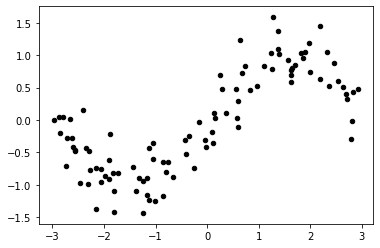

In [2]:
rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100) #random.uniform，从输入的任意两个整数中取出size个随机数
#生成y的思路：先使用NumPy中的函数生成一个sin函数图像，然后再人为添加噪音
y = np.sin(X) + rnd.normal(size=len(X)) / 3 #random.normal，生成size个服从正态分布的随机数
#使用散点图观察建立的数据集是什么样子
plt.scatter(X, y,marker='o',c='k',s=20)
plt.show()
#为后续建模做准备：sklearn只接受二维以上数组作为特征矩阵的输入
X.shape
X = X.reshape(-1, 1)

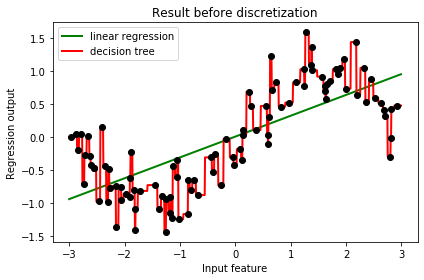

In [55]:
LinearR = LinearRegression().fit(X, y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X, y)
#放置画布
fig, ax1 = plt.subplots(1)
#创建测试数据：一系列分布在横坐标上的点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)#.transpose()
#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',
label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',
label="decision tree")
#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k')
#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
plt.tight_layout()
plt.show()

In [56]:
from sklearn.preprocessing import KBinsDiscretizer
#将数据分箱
enc = KBinsDiscretizer(n_bins=10,encode="onehot") #ordinal
X_binned = enc.fit_transform(X)
#encode模式"onehot"：使用做哑变量方式做离散化
#之后返回一个稀疏矩阵(m,n_bins)，每一列是一个分好的类别
#对每一个样本而言，它包含的分类（箱子）中它表示为1，其余分类中它表示为0
X.shape

(100, 1)

In [57]:
X_binned.shape

(100, 10)

In [58]:
X_binned

<100x10 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [59]:
#使用pandas打开稀疏矩阵
import pandas as pd
pd.DataFrame(X_binned.toarray()).head()
# X_binned.shape
# X_binned.toarray().shape
pd.DataFrame(X_binned.toarray()).shape

(100, 10)

In [60]:
LinearR_ = LinearRegression().fit(X_binned, y)

In [61]:
line.shape

(1000, 1)

In [62]:
LinearR_.predict(line) #line作为测试集
line.shape #测试

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 1)

In [63]:
X_binned.shape #训练
#因此我们需要创建分箱后的测试集：按照已经建好的分箱模型将line分箱
line_binned = enc.transform(line)
line_binned.shape #分箱后的数据是无法进行绘图的
line_binned
LinearR_.predict(line_binned).shape

(1000,)

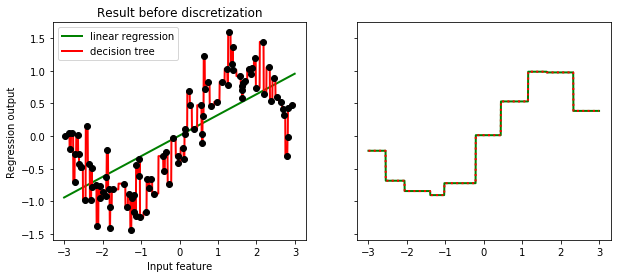

In [64]:
#准备数据
enc = KBinsDiscretizer(n_bins=10,encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)
#将两张图像绘制在一起，布置画布
fig, (ax1, ax2) = plt.subplots(ncols=2
, sharey=True #让两张图共享y轴上的刻度
, figsize=(10, 4))
#在图1中布置在原始数据上建模的结果
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',
label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',
label="decision tree")
ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
#使用分箱数据进行建模
LinearR_ = LinearRegression().fit(X_binned, y)
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)
#进行预测，在图2中布置在分箱数据上进行预测的结果
ax2.plot(line #横坐标
, LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
, linewidth=2
, color='green'
, linestyle='-'
, label='linear regression')
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',
linestyle=':', label='decision tree')

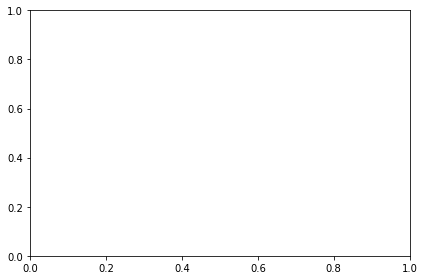

In [65]:
#绘制和箱宽一致的竖线
ax2.vlines(enc.bin_edges_[0] #x轴
            , *plt.gca().get_ylim() #y轴的上限和下限
            , linewidth=1
            , alpha=.2)
#将原始数据分布放置在图像上
ax2.plot(X[:, 0], y, 'o', c='k')
#其他绘图设定
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

0.8649069759304867


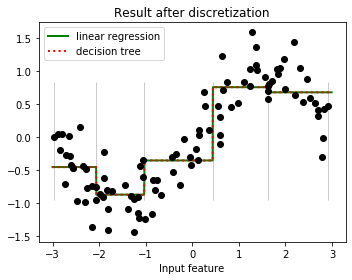

In [66]:
enc = KBinsDiscretizer(n_bins=5,encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)
fig, ax2 = plt.subplots(1,figsize=(5,4))
LinearR_ = LinearRegression().fit(X_binned, y)
print(LinearR_.score(line_binned,np.sin(line)))
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)
ax2.plot(line #横坐标
, LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
, linewidth=2
, color='green'
, linestyle='-'
, label='linear regression')
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',
linestyle=':', label='decision tree')
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.plot(X[:, 0], y, 'o', c='k')
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

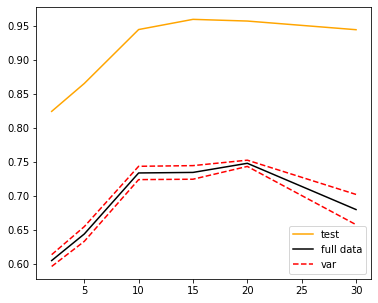

In [67]:
from sklearn.model_selection import cross_val_score as CVS
import numpy as np
pred,score,var = [], [], []
binsrange = [2,5,10,15,20,30]
for i in binsrange:
        #实例化分箱类
        enc = KBinsDiscretizer(n_bins=i,encode="onehot")
        #转换数据
        X_binned = enc.fit_transform(X)
        line_binned = enc.transform(line)
        #建立模型
        LinearR_ = LinearRegression()
        #全数据集上的交叉验证
        cvresult = CVS(LinearR_,X_binned,y,cv=5)
        score.append(cvresult.mean())
        var.append(cvresult.var())
        #测试数据集上的打分结果
        pred.append(LinearR_.fit(X_binned,y).score(line_binned,np.sin(line)))
        #绘制图像
plt.figure(figsize=(6,5))
plt.plot(binsrange,pred,c="orange",label="test")
plt.plot(binsrange,score,c="k",label="full data")
plt.plot(binsrange,score+np.array(var)*0.5,c="red",linestyle="--",label = "var")
plt.plot(binsrange,score-np.array(var)*0.5,c="red",linestyle="--")
plt.legend()
plt.show()